<a href="https://colab.research.google.com/github/ayaemad10/detect-and-predict-of-the-space-debris/blob/main/Vo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

from random import randrange
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from random import seed
from random import random
import plotly.express as px
import plotly.graph_objects as go
from random import gauss
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error

In [2]:
# Load data from CSV
data = pd.read_csv("/content/Satellite1 Inertial Position Velocity.csv")

# Convert 'Time (UTCG)' to datetime index
data["Time (UTCG)"] = pd.to_datetime(data["Time (UTCG)"])
data.set_index("Time (UTCG)", inplace=True)

# Check for missing values
print(data.isnull().sum())

# Select relevant columns for prediction
df = data[["x (km)", "y (km)", "z (km)"]]

x (km)         0
y (km)         0
z (km)         0
vx (km/sec)    0
vy (km/sec)    0
vz (km/sec)    0
dtype: int64


In [3]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]
# Create VAR model
model = VAR(endog=train_data)

# Fit the model
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [4]:
# Print model summary
print(model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Jul, 2024
Time:                     08:52:22
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    49.8223
Nobs:                     427.000    HQIC:                   49.7534
Log likelihood:          -12418.4    FPE:                3.87305e+21
AIC:                      49.7083    Det(Omega_mle):     3.76621e+21
--------------------------------------------------------------------
Results for equation x (km)
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const           276.277346       195.134968            1.416           0.157
L1.x (km)        -0.092861         0.048631           -1.909           0.056
L1.y (km)        -0.021964         0.037319           -0.589           0.55

In [5]:
# Make predictions
lag_order = model_fit.k_ar
forecast_input = train_data.values[-lag_order:]
forecast = model_fit.forecast(y=forecast_input, steps=len(test_data))

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(
    forecast, index=test_data.index, columns=["x_pred", "y_pred", "z_pred"]
)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast_df))
print("RMSE:", rmse)

RMSE: 4166.448388793346


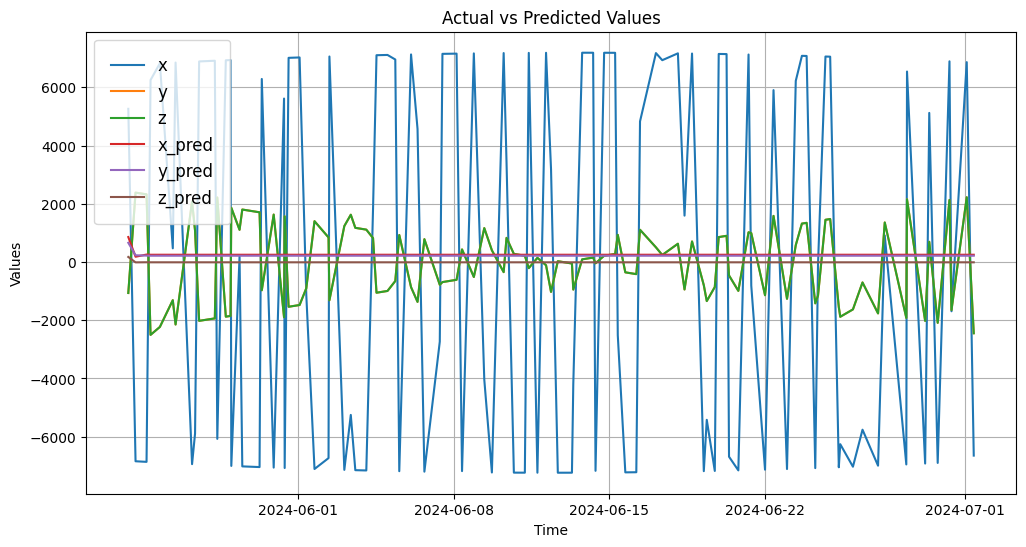

In [6]:
# Visualization with improved legend
plt.figure(figsize=(12, 6))
plt.plot(test_data["x (km)"], label="x")
plt.plot(test_data["y (km)"], label="y")
plt.plot(test_data["y (km)"], label="z")
plt.plot(forecast_df["x_pred"], label="x_pred")
plt.plot(forecast_df["y_pred"], label="y_pred")
plt.plot(forecast_df["z_pred"], label="z_pred")

# Customize legend appearance
plt.legend(
    fontsize="large", loc="upper left", borderpad=1
)  # Adjust parameters as needed
plt.title("Actual vs Predicted Values")
plt.xlabel("Time")
plt.ylabel("Values")
plt.grid(True)
plt.show()